In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
df = pd.read_excel("glass.xlsx",sheet_name="glass")
print(df.head())
print(df.info())
print(df.describe())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
     

In [31]:
print(df.isnull().sum())


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [32]:
# Example: fill missing with mean
df.fillna(df.mean(), inplace=True)


In [38]:
X = df.drop("Type", axis=1)
y = df["Type"]


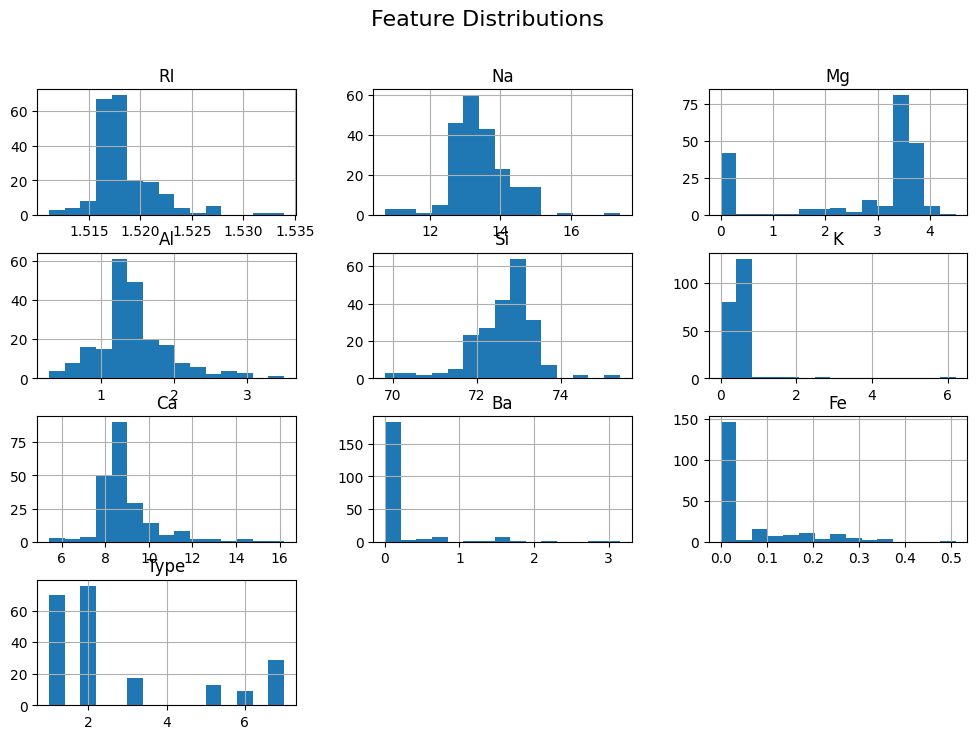

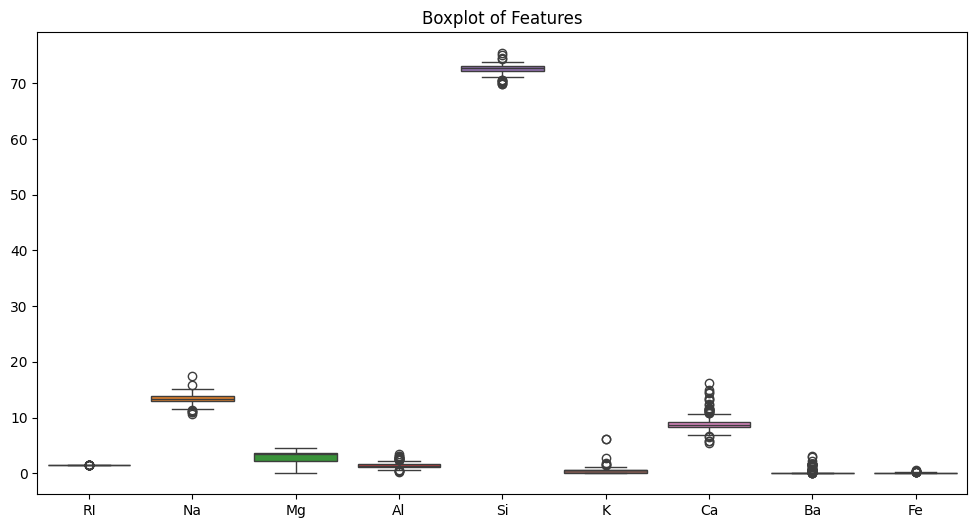

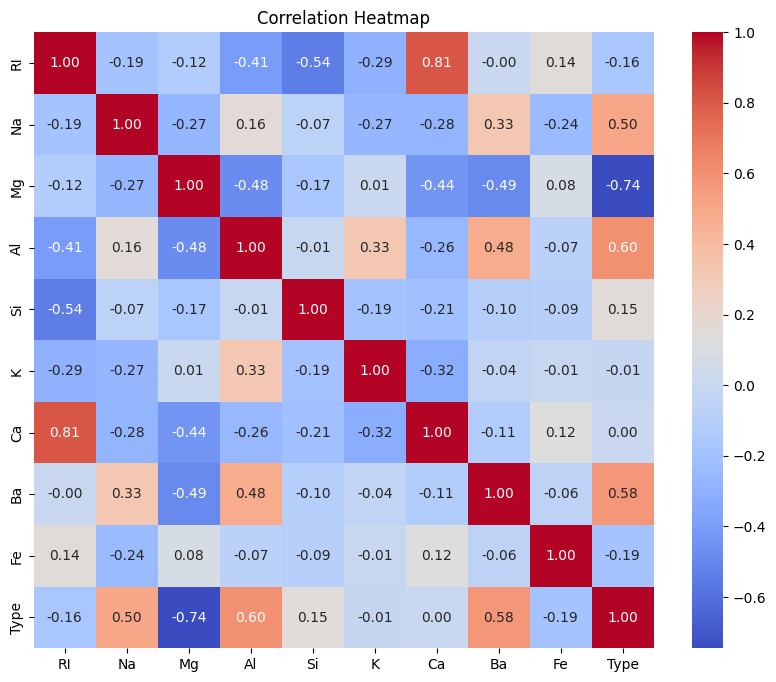

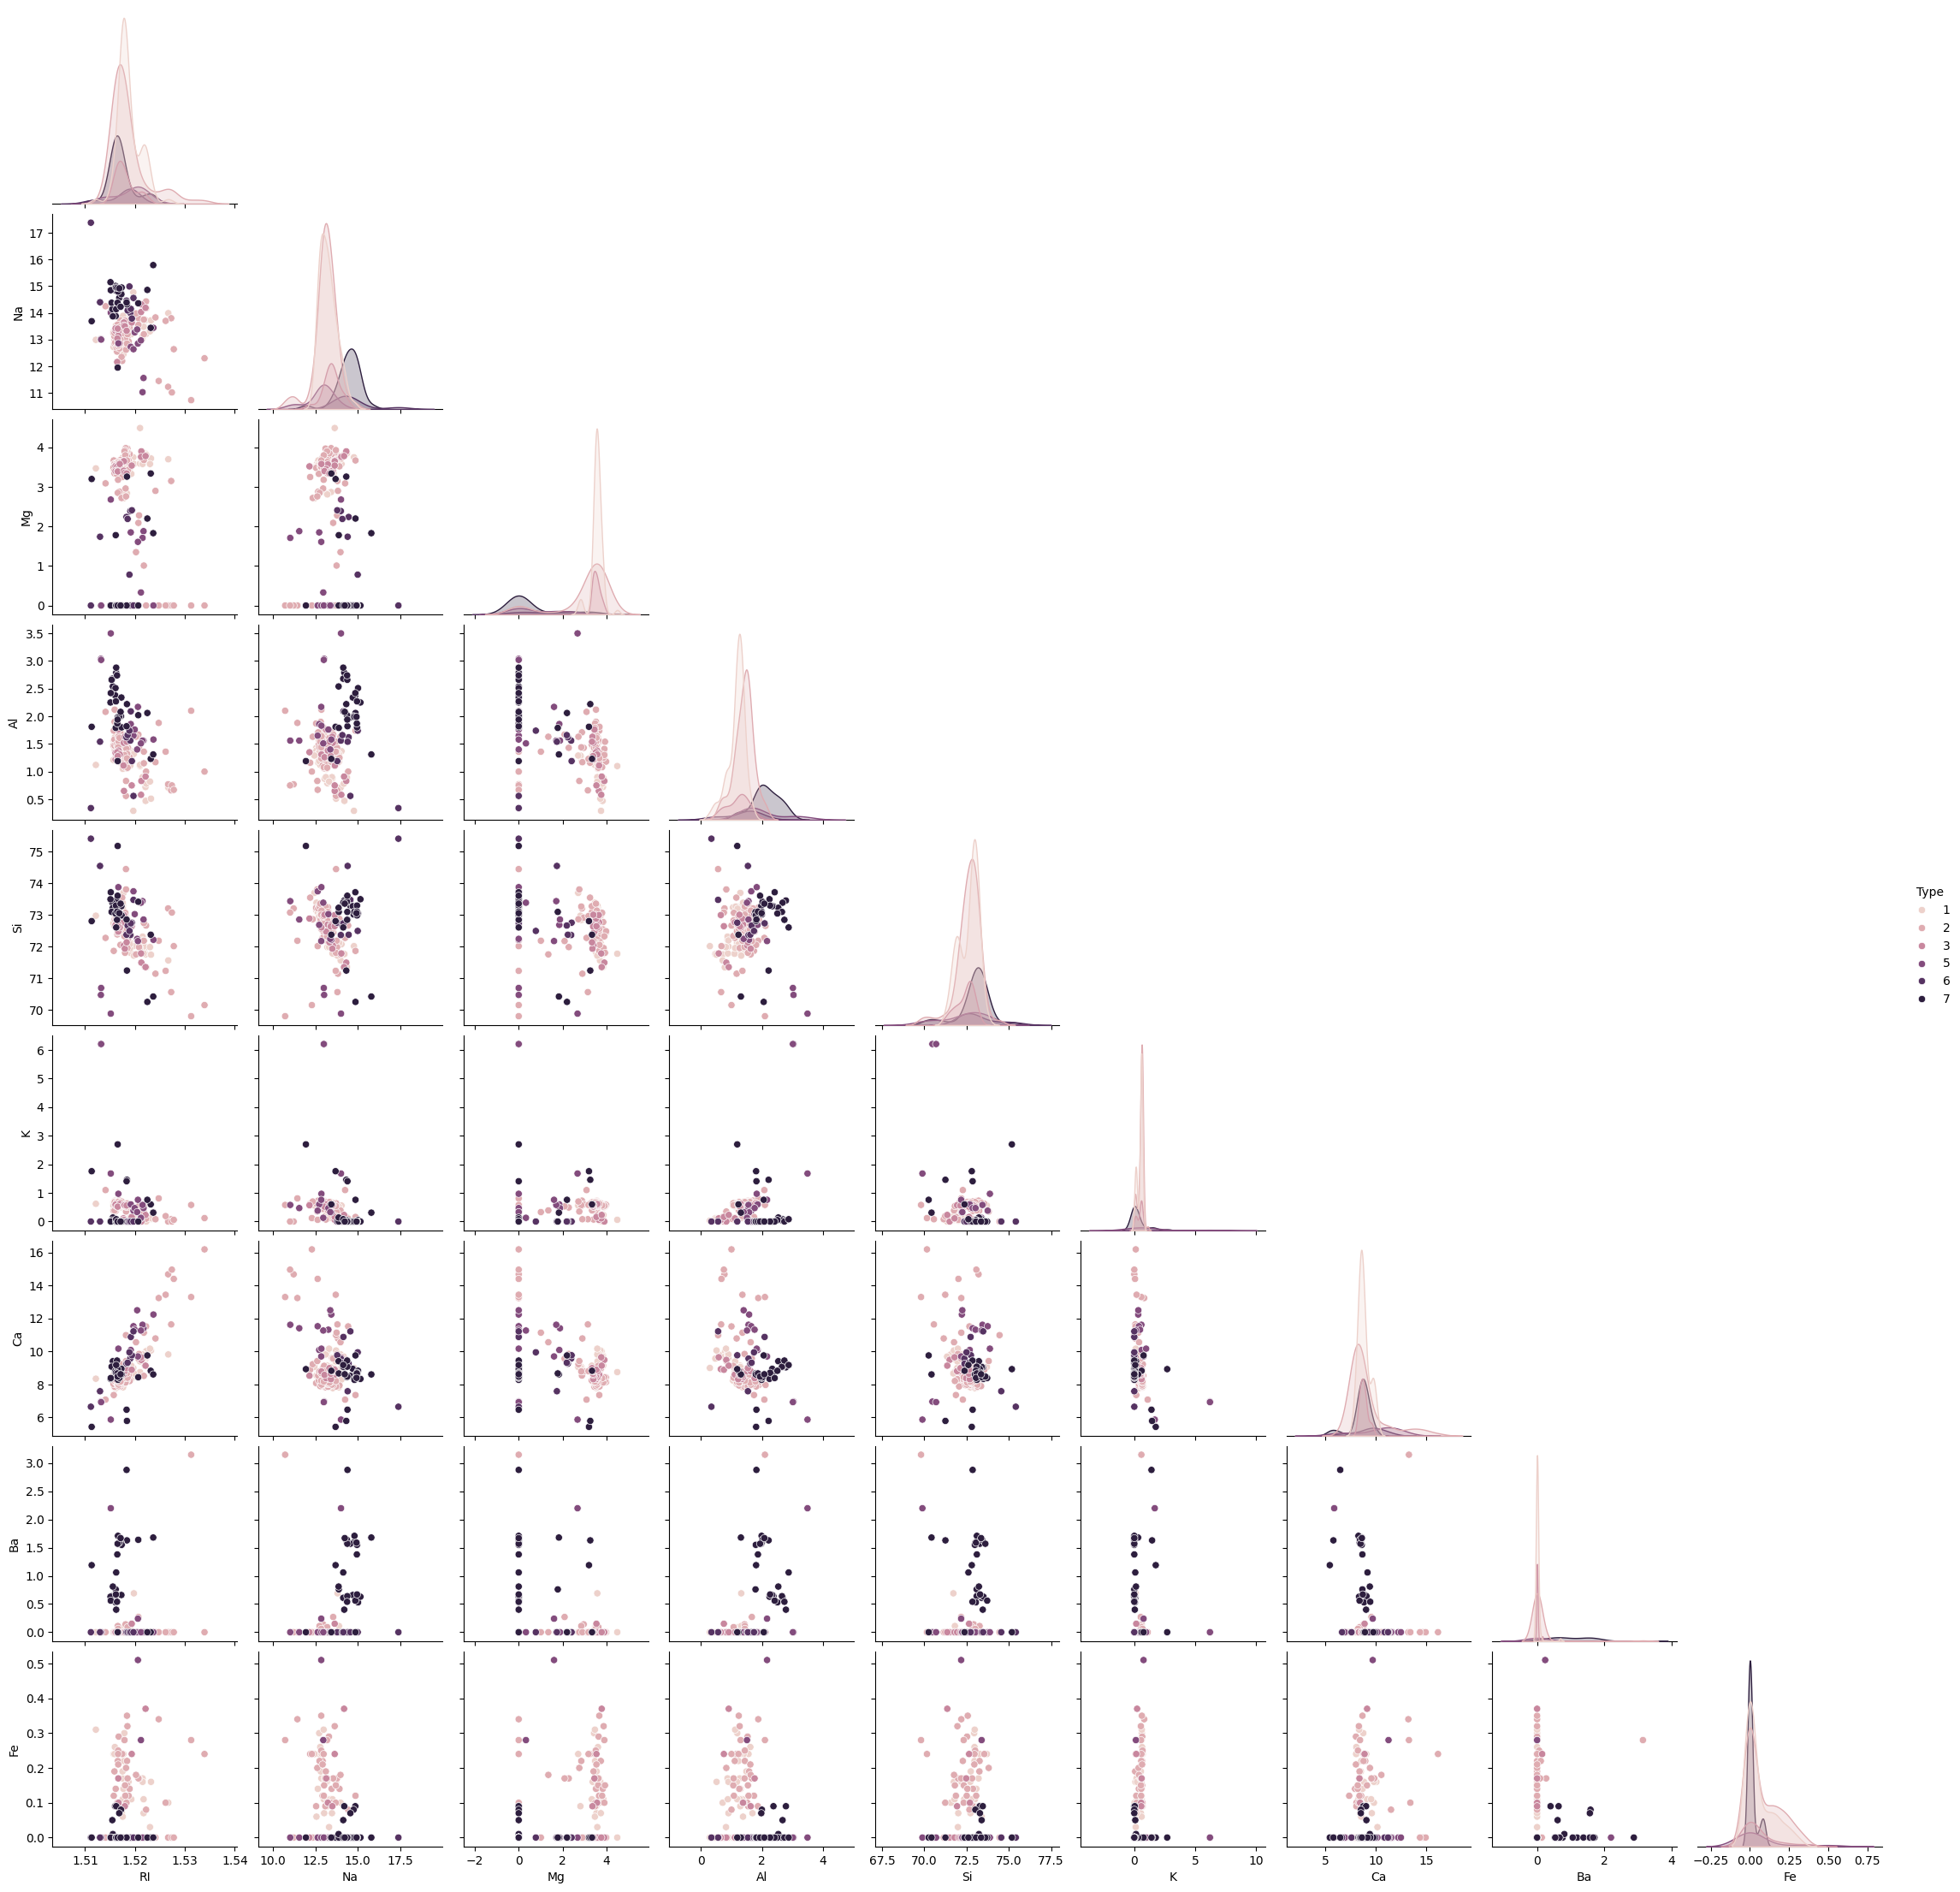

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for all features
df.hist(figsize=(12, 8), bins=15)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 2. Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("Type", axis=1))  # Exclude target variable
plt.title("Boxplot of Features")
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Pairplot to see feature relationships (optional for large datasets)
sns.pairplot(df, hue="Type", corner=True)
plt.show()


In [51]:
X = df.drop("Type", axis=1)
y = df["Type"]


In [39]:
print(y.value_counts())


Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [68]:
# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions (optional)
y_pred = rf_model.predict(X_test)

#Print first 10 predictions
print("Predictions for first 10 test samples:", y_pred[:10])

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Predictions for first 10 test samples: [1 2 5 7 3 2 3 1 2 1]
Accuracy: 0.8307692307692308

Confusion Matrix:
 [[20  1  0  0  0  0]
 [ 2 18  0  2  1  0]
 [ 3  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.95      0.87        21
           2       0.86      0.78      0.82        23
           3       1.00      0.40      0.57         5
           5       0.60      0.75      0.67         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.83      0.80      0.79        65
weighted avg       0.85      0.83      0.83        65

